In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = (12.0, 10.0)

Text(0.5,1,'Selected points with their separating line.')

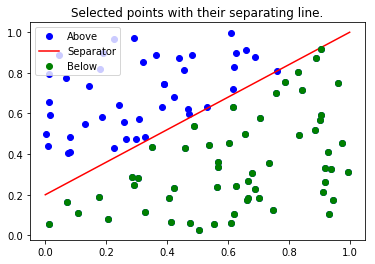

In [2]:
N = 100
xn = nr.rand(N, 2)

x = np.linspace(0, 1)
a, b = 0.8, 0.2
f = lambda x : a*x + b
fig = pl.figure()
figa = pl.gca()

pl.plot(xn[:,0],xn[:,1],'bo')
pl.plot(x,f(x),'r')
# Linearly separate the points by the line
yn = np.zeros([N,1])

for i in xrange(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
#figa.axes.get_xaxis().set_visible(False)
#figa.axes.get_yaxis().set_visible(False)

In [3]:
def perceptron(xn, yn, max_iter=1000, w=np.zeros(3)):
    '''
        A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {-1,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 
        
        Input: 
            xn : Data points, an Nx2 vector. 
            yn : Classification of the previous data points, an Nx1 vector. 
            max_iter : Maximum number of iterations (optional).
            w  : Initial vector of parameters (optional).
            
        Output: 
            w : Parameters of the best line, y = ax+b, that linearly separates the data. 
        
        Note:
            Convergence will be slower than expected, since this implementation picks points
            to update without a specific plan (randomly). This is enough for a demonstration, not 
            so good for actual work. 
'''
    
    N = xn.shape[0]
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for _ in xrange(max_iter):
        i = nr.randint(N) # try a random sample from the dataset
        print i, xn[i,0], xn[i,1], f(xn[i,:]), yn[i]
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
            w[0] = w[0] + yn[i] # the first weight is effectively the bias
            w[1] = w[1] + yn[i] * xn[i,0]
            w[2] = w[2] + yn[i] * xn[i,1]
            
                
                
            
    return w

w = perceptron(xn, yn, max_iter=5)

2 0.8897043076606239 0.8723020816775247 0.0 [1.]
67 0.9185868226529622 0.3294499394051401 1.0 [1.]
77 0.5038600112458778 0.02676158330078804 1.0 [1.]
77 0.5038600112458778 0.02676158330078804 1.0 [1.]
98 0.3288411297276471 0.4837606915609356 1.0 [-1.]


10 0.6259865424892918 0.245199274645728 1.0 [1.]
20 0.9201367482791568 0.2630159862039627 1.0 [1.]
73 0.26367321772372954 0.4732175708614681 1.0 [-1.]
83 0.8319074521748311 0.8025269609582765 -1.0 [1.]
54 0.326360672661998 0.11521896574995916 1.0 [1.]
23 0.6170719185541703 0.6299195680818825 1.0 [1.]
47 0.39074424555265796 0.745069293534329 1.0 [-1.]
60 0.7599934201940456 0.8083036205928528 -1.0 [-1.]
3 0.421762212113559 0.2330072274367876 -1.0 [1.]
47 0.39074424555265796 0.745069293534329 1.0 [-1.]
10 0.6259865424892918 0.245199274645728 -1.0 [1.]
79 0.2903537217736959 0.970105865021971 1.0 [-1.]
59 0.566611722620102 0.3628617471040798 -1.0 [1.]
10 0.6259865424892918 0.245199274645728 1.0 [1.]
86 0.07407130343746748 0.40493082738202835 -1.0 [-1.]
91 0.6251884502488123 0.9000453334502785 1.0 [-1.]
75 0.17967175287754855 0.8182751700759293 -1.0 [-1.]
53 0.010786406853629638 0.7937750885129091 -1.0 [-1.]
29 0.832707506856573 0.49406283773098103 -1.0 [1.]
90 0.18694751818266575 0.58407454

79 0.2903537217736959 0.970105865021971 -1.0 [-1.]
73 0.26367321772372954 0.4732175708614681 -1.0 [-1.]
66 0.5307055918027078 0.6299164995599503 -1.0 [-1.]
91 0.6251884502488123 0.9000453334502785 -1.0 [-1.]
46 0.39100483835379296 0.7441659987956225 -1.0 [-1.]
30 0.9757039883956033 0.45541989747676037 1.0 [1.]
25 0.6116875845977625 0.06032494456854187 1.0 [1.]
28 0.2977619428809787 0.4724499694320218 -1.0 [-1.]
16 0.0669706285514935 0.7750313461963069 -1.0 [-1.]
8 0.6878813761412303 0.876997636350054 -1.0 [-1.]
85 0.9467392480709438 0.1757897400042988 1.0 [1.]
85 0.9467392480709438 0.1757897400042988 1.0 [1.]
73 0.26367321772372954 0.4732175708614681 -1.0 [-1.]
46 0.39100483835379296 0.7441659987956225 -1.0 [-1.]
65 0.9607391100417091 0.7495895531046597 1.0 [1.]
12 0.129389653961002 0.5499825001662295 -1.0 [-1.]
57 0.7494572020291802 0.1248040903010893 1.0 [1.]
27 0.604749336823331 0.45697196415961616 1.0 [1.]
40 0.3489996607028899 0.43706793767565644 1.0 [1.]
56 0.013479407910479635 0

85 0.9467392480709438 0.1757897400042988 1.0 [1.]
7 0.2902717636980533 0.24625250784913333 1.0 [1.]
66 0.5307055918027078 0.6299164995599503 -1.0 [-1.]
39 0.9376943140420599 0.32683621413661024 1.0 [1.]
49 0.4239663298715033 0.682184109245474 -1.0 [-1.]
24 0.25905930684872325 0.5605140662879602 -1.0 [-1.]
73 0.26367321772372954 0.4732175708614681 -1.0 [-1.]
52 0.41440078886490916 0.0676558919092386 1.0 [1.]
36 0.2051987301443855 0.07818204171267307 1.0 [1.]
29 0.832707506856573 0.49406283773098103 1.0 [1.]
44 0.3637912039621194 0.8887063927393358 -1.0 [-1.]
60 0.7599934201940456 0.8083036205928528 -1.0 [-1.]
14 0.6100442545519208 0.9973783212616913 -1.0 [-1.]
55 0.7339757553391703 0.3539893634517103 1.0 [1.]
39 0.9376943140420599 0.32683621413661024 1.0 [1.]
7 0.2902717636980533 0.24625250784913333 1.0 [1.]
17 0.3087453877717563 0.5744239785860742 -1.0 [-1.]
14 0.6100442545519208 0.9973783212616913 -1.0 [-1.]
13 0.6790317084429436 0.3053494019748565 1.0 [1.]
84 0.8427753564811918 0.717

3 0.421762212113559 0.2330072274367876 1.0 [1.]
29 0.832707506856573 0.49406283773098103 1.0 [1.]
67 0.9185868226529622 0.3294499394051401 1.0 [1.]
57 0.7494572020291802 0.1248040903010893 1.0 [1.]
33 0.6656632945961576 0.2662075433961172 1.0 [1.]
77 0.5038600112458778 0.02676158330078804 1.0 [1.]
91 0.6251884502488123 0.9000453334502785 1.0 [-1.]
10 0.6259865424892918 0.245199274645728 1.0 [1.]
61 0.10697126484913133 0.11163202454676224 -1.0 [1.]
65 0.9607391100417091 0.7495895531046597 1.0 [1.]
38 0.4545595727650604 0.8126386711028674 -1.0 [-1.]
36 0.2051987301443855 0.07818204171267307 1.0 [1.]
47 0.39074424555265796 0.745069293534329 -1.0 [-1.]
57 0.7494572020291802 0.1248040903010893 1.0 [1.]
47 0.39074424555265796 0.745069293534329 -1.0 [-1.]
1 0.3846580240589488 0.6297844494482938 -1.0 [-1.]
91 0.6251884502488123 0.9000453334502785 -1.0 [-1.]
50 0.22515933416699407 0.9648885332968358 -1.0 [-1.]
19 0.6622154982037872 0.17214822260493867 1.0 [1.]
90 0.18694751818266575 0.584074541

ValueError: c of shape (100, 1) not acceptable as a color sequence for x with size 100, y with size 100

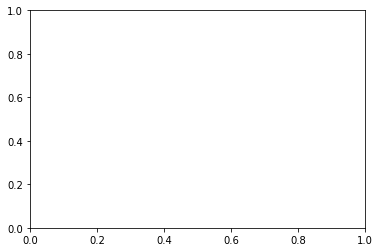

In [4]:
w = perceptron(xn, yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()

pl.title('Comparison between the linear separator and the perceptron approximation.')


Text(0.5,1,'Classification based on f(x)')

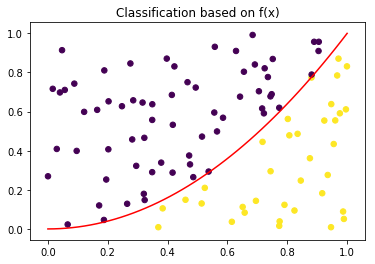

In [5]:
f = lambda x: x**2;

x = np.linspace(0,1);

# Generate some data points to play with.
N = 100
xn = nr.rand(N,2)

fig = pl.figure()
figa = pl.gca();

# Plot classifier 
pl.plot(x,f(x),'r')

# Classify based on f(x)
yn = np.sign(f(xn[:,0])-xn[:,1])

colors = (yn+1)/2.0;

pl.scatter(xn[:,0],xn[:,1],c=colors,s=30);
pl.title('Classification based on f(x)')
